# Developing an Image Retrieval System with deep features

Using deep feature form model CNN imagenet to extract my dataset feature. Apply transfer learning techniques to use deep features learned with one data set to get great preformance on a different data set and build model for image retrieval and image classification task

## Import Module

In [1]:
import turicreate as tc
import matplotlib.pyplot as plt

## Load train set and test set data

in this case, we will use a popular benchmark dataset in computer vision that called CIFFAR-10, this data set containt 4 categories (cat, dog, bird, and auto mobile)

In [2]:
train_data = tc.SFrame('image_train_data')
test_data = tc.SFrame('image_test_data')

## Explore Data set

this simple exploration just to know characteristics of the data set, for the example: 

- how many image is in each dataset (train set and test set) ?
- Are the labels in each data set (train set and test set) balanced ?

#### How many image is in each dataset

In [3]:
len(train_data)

2005

In [4]:
len(test_data)

4000

#### Unique of label image

In [5]:
train_label = train_data.groupby('label',operations={'count':tc.aggregate.COUNT()})
label = train_label['label'].unique()

count_list =[]
for record in train_label:
    count_list.append(record['count'])

In [6]:
test_label = test_data.groupby('label',operations={'count':tc.aggregate.COUNT()})
label2 = test_label['label'].unique()

count_list2 =[]
for record in test_label:
    count_list2.append(record['count'])

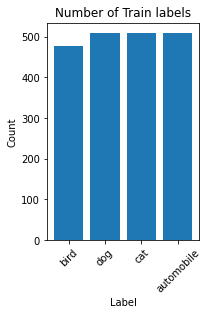

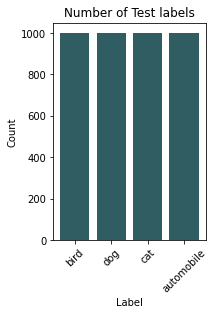

In [7]:
plt.subplot(1,2,1)
plt.title('Number of Train labels')
plt.xlabel('Label')
plt.ylabel('Count')

plt.xticks(rotation='45')
plt.bar(label,count_list)
plt.show()

plt.subplot(1,2,2)
plt.title('Number of Test labels')
plt.xlabel('Label')
plt.ylabel('Count')

plt.xticks(rotation='45')
plt.bar(label2,count_list2,color='#2f5d62')
plt.show()

In [8]:
tc.Sketch(train_data['label'])


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


## Classification Image

Apply deep features to make model for classification task using logistic regression method, and see how the model performs using deep features

#### Get deep features using extracted features imagenet model

In [9]:
#deep_learning_model = tc.load_model('imagenet_model_iter45')
#train_data['deep_features'] = deep_learning_model.extract_features(train_data)('imagenet_model_iter45')

In [10]:
train_data

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


#### Given the deep features, train a logistic classifier

In [11]:
deep_features_model = tc.logistic_classifier.create(train_data,target='label',features=['deep_features'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 1.672503     | 0.756828          | 0.772277            |

| 1         | 6        | 0.250000  | 2.569505     | 0.761555          | 0.772277            |

| 2         | 8        | 0.202674  | 3.235609     | 0.773634          | 0.782178            |

| 3         | 12       | 0.608023  | 4.331042     | 0.795693          | 0.792079            |

| 4         | 13       | 0.760029  | 4.814098     | 0.815126          | 0.782178            |

| 9         | 19       | 1.000000  | 7.207613     | 0.926471          | 0.801980            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

#### Quantitatively evaluate deep features classifier on test data

In [12]:
deep_features_model.evaluate(test_data)

{'accuracy': 0.7935,
 'auc': 0.9420620833333333,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |    automobile   |   12  |
 |     bird     |       bird      |  796  |
 |  automobile  |       bird      |   14  |
 |     dog      |       bird      |   46  |
 |     cat      |    automobile   |   23  |
 |     cat      |       cat       |  709  |
 |     bird     |       cat       |  138  |
 |     cat      |       dog       |  205  |
 |     dog      |       dog       |  707  |
 |     bird     |       dog       |   53  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.7948527524067499,
 'log_loss': 0.6150827198534083,
 'precision

#### Apply the deep features classifier on the first few images

lets apply the logistic model to predict some image

,SArray
0,
1,
2,

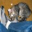
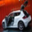
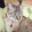

In [13]:
test_data[0:3]['image'].explore()

In [14]:
deep_features_model.predict(test_data[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

## Nearest Neighbors

Nearest Neighbors algorthm that similar things exist in close proximity. is this optimation problem to finding the point in a deep features of the image that is closest or most similar to a given point

### Train a nearest neighbors model using train set

#### Create a nearest neighbors model to retrieve image from deep features using train set

now, we will now build a simple image retrieval system to finds the nearest neighbors for any image using train set

In [15]:
knn_model = tc.nearest_neighbors.create(train_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

####  Apply NN model to find similar images

Create a simple function to veiw the nearest neighbors result

In [22]:
def get_images_from_ids(query_result):
    print(query_result)
    return train_data.filter_by(query_result['reference_label'],'id')

finding similar images to a bird

,SArray
0,

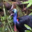

In [25]:
bird_im = train_data[0:1]
bird_im['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 17.661ms     |

| Done         |         | 100         | 179.814ms    |

+--------------+---------+-------------+--------------+

+-------------+-----------------+-------------------+------+
| query_label | reference_label |      distance     | rank |
+-------------+-----------------+-------------------+------+
|      0      |        24       |        0.0        |  1   |
|      0      |      30224      | 36.54547656421385 |  2   |
|      0      |      34071      | 37.80114508781701 |  3   |
|      0      |      37742      | 41.03992996157689 |  4   |
|      0      |      36130      | 41.51054472137894 |  5   |
+-------------+-----------------+-------------------+------+
[5 rows x 4 columns]



,SArray
0,
1,
2,
3,
4,

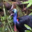
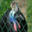
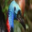
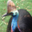
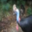

In [24]:
bird_nn = get_images_from_ids(knn_model.query(train_data[0:1]))
bird_nn['image'].explore()

<h1 align='center'> END <h1>